# Data Cleaning & Normalization

### Missing values & Outliers 

We have chosen to remove the rows containing NaN values because they appeared to be randomly distributed across the dataset and were very few in percentage.
Imputation was avoided to prevent bias.

### Interquartile Range (IQR) & Scaling
Outiers were detected using the IQR method because it's suitable for outliers and skewed data distribution. The outliers were replaced with the respective column median per langague to reduce distorion in the dataset. Because the dataset was rather small and contained several variables that were not normally-distributed, median imputation is preffered over mean imputation.


## What we did

We copied the original dataset to be able to compare it to the cleaned version.
We removed the 'caps' column.







In [210]:
import pandas as pd
from scipy import stats
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
# pd.set_option('display.max_rows', None)

data = pd.read_csv("assignment_3_dataset.csv")
df = pd.DataFrame(data)
df_original = df.copy()
df['lang'] = df['lang'].astype(str).str.strip().str.lower()
df = df.drop(columns=['caps'])

numeric_cols = df.select_dtypes(include=[np.number]).columns
df = df.dropna(subset=numeric_cols)



for col in numeric_cols:
    Q1 = df.groupby('lang')[col].transform('quantile', 0.25)
    Q3 = df.groupby('lang')[col].transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_per_lang = df.groupby('lang')[col].transform('median')
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    df.loc[outliers, col] = median_per_lang[outliers]


# Clean data:
numeric_cols_2 = df.select_dtypes(include=[np.number])
numeric_cols_2 = numeric_cols_2.drop(numeric_cols_2.columns[0], axis=1)


scaler = RobustScaler()
scaled_data = scaler.fit_transform(numeric_cols_2)
scaled_df = pd.DataFrame(scaled_data,
                         columns=numeric_cols_2.columns)



html = f"""
<div style="display:flex; justify-content: space-between;">
    <div style="width:48%">
        <h4>Original Data</h4>
        {df_original.head(80).to_html()}
    </div>
    <div style="width:48%">
        <h4>Cleaned Data</h4>
        {df.head(80).to_html()}
    </div>
</div>
"""
display(HTML(html))










,Unnamed: 0,person,lang,z1000t,z0t,z1000mem,stmtL,z1000rel,m1000rel,whours,caps
0,0,s018,c,0.017,0.017,22432,16.10,98.10,96.8,16.10,??
1,1,s030,C,NaN,0.033,16968,4.00,76.47,92.1,4.00,??
2,2,s036,c,20.900,0.000,11440,8.20,0.00,89.5,8.20,??
3,3,s066,C,0.750,0.467,2952,7.30,98.48,100.0,7.30,??
4,4,s078,c,0.050,0.050,22496,10.90,99.24,98.4,10.90,??
5,5,s015,c++,0.050,0.050,24616,11.20,99.24,100.0,11.20,??
6,6,s020,C++,1.983,0.550,6384,3.00,98.48,98.4,3.00,??
7,7,s021,c++,4.867,0.017,5312,NaN,100.00,98.4,NaN,??
8,8,s025,c++,0.083,0.083,28568,3.50,99.24,98.4,3.50,??
9,9,s027,c++,1.533,0.000,3472,25.30,98.09,100.0,25.30,??


## Exploratory Data Analysis

We started by examinating the descriptive statistics of the dataset.
Initally, the graphs show noticable perfomance differences betrween the languages. For example, by looking at Rexx, especially the runtime metrics (z1000t & z0t), it appears that Rexx performs significantly worse compared to the other langagues.
However, it's crucial to analyze the data more carefully before drawing any conclusions. In this case Rexx has only four datapoints compared to java which has twenty-three. Furthermore, Rexx's data points are highly scattered, displaying large variance in performance. This imbalance and variability makes it difficult to be able draw a reliable conclusion about Rexx's performance.

Moving on, the results indicate that the languages C and C++ are among the ones with the lowert runtimes, while C++ also shows the lowest memory consumption.
We can also tell C, C++ and Java display the highest median values for work hours (whours) and lines of code (stmtL). This could possibly suggest that C languages demand higher implementation complexity or require more manual effort compared to the other langagues which appear to be less time-consuming. 




/tmp/ipykernel_1035/3246060172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='lang', y=col, data=median_stats, palette='viridis')
/tmp/ipykernel_1035/3246060172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='lang', y=col, data=median_stats, palette='viridis')
/tmp/ipykernel_1035/3246060172.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x='lang', y=col, data=median_stats, palette='viridis')
/tmp/ipykernel_1035/3246060172.py:10: FutureWarning: 

Passing `palette` without assigning `hu

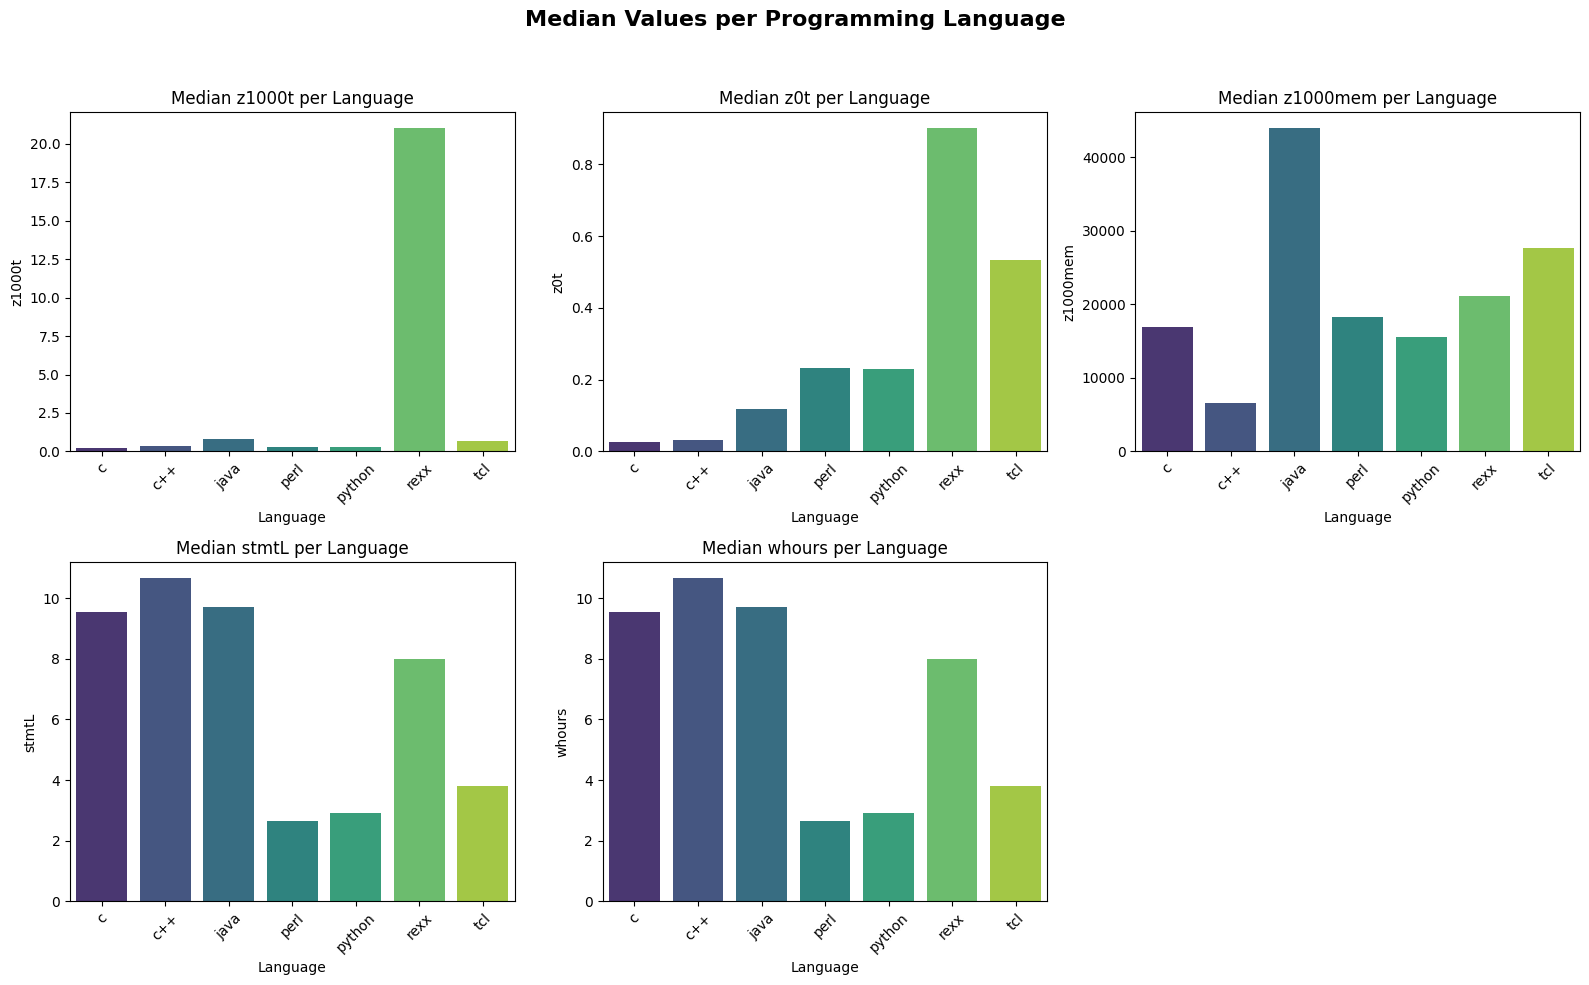

In [226]:

cols_to_plot = ['z1000t', 'z0t', 'z1000mem', 'stmtL', 'whours']
median_stats = df.groupby('lang')[cols_to_plot].median().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(16,10))
fig.suptitle("Median Values per Programming Language", fontsize=16, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(cols_to_plot):
    sns.barplot(ax=axes[i], x='lang', y=col, data=median_stats, palette='viridis')
    axes[i].set_title(f"Median {col} per Language")
    axes[i].set_xlabel("Language")
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Correlation Analysis

* Compute correlation coefficients (Pearson or Spearman as appropriate). 
* Create a correlation heatmap.
* Interpret at least two interesting relationships.


            Unnamed: 0  z1000t   z0t  z1000mem  stmtL  z1000rel  m1000rel  \
Unnamed: 0        1.00    0.16  0.71     -0.10  -0.44     -0.12      0.24   
z1000t            0.16    1.00  0.51     -0.02   0.06     -0.74     -0.13   
z0t               0.71    0.51  1.00     -0.02  -0.28     -0.36      0.16   
z1000mem         -0.10   -0.02 -0.02      1.00   0.25      0.08     -0.54   
stmtL            -0.44    0.06 -0.28      0.25   1.00     -0.02     -0.18   
z1000rel         -0.12   -0.74 -0.36      0.08  -0.02      1.00      0.10   
m1000rel          0.24   -0.13  0.16     -0.54  -0.18      0.10      1.00   
whours           -0.44    0.06 -0.28      0.25   1.00     -0.02     -0.18   

            whours  
Unnamed: 0   -0.44  
z1000t        0.06  
z0t          -0.28  
z1000mem      0.25  
stmtL         1.00  
z1000rel     -0.02  
m1000rel     -0.18  
whours        1.00  


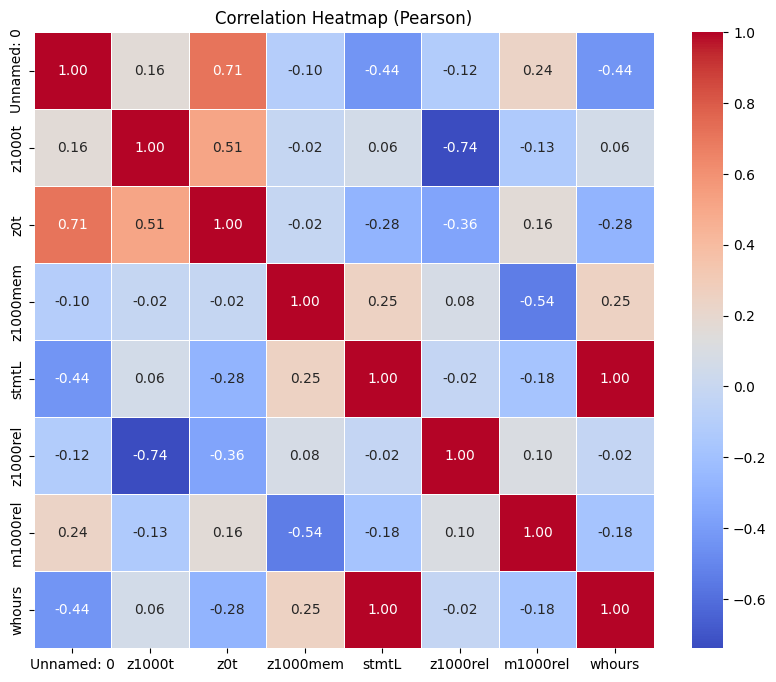

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ta bara numeriska kolumner
numeric_df = numeric_cols_2.select_dtypes(include=['float64', 'int64'])

# Beräkna korrelationsmatris (Pearson)
corr_matrix = numeric_df.corr(method='pearson')

# Visa matrisen i terminal (valfritt)
print(corr_matrix.round(2))

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Pearson)")
plt.show()



## Hypothesis Testing
* Formulate at least two sets (h0, h1..) of interesting hypotheses (e.g., “Programs written in interpreted languages are slower than compiled languages”).
* Perform a statistical test with an appropriate method to confirm or reject your hypotheses.
* Report test statistic, p-value, and interpretation.


## Visualization & Reporting

* Write an executive summary (1/2p max) of your findings. What does the data tell you?
* Use appropriate plots to support your findings (scatter plots with trendlines, boxplots, bar charts, histograms, etc.).
* Short motivation for the selected analysis and visualization techniques. For example, if you choose to use Pearson’s r, briefly explain the method and justify why you think it is appropriate to use it over Spearman’s r. If you chose to present a boxplot, briefly explain the quantiles.